In [13]:
#!conda install arcpy

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... failed



PackagesNotFoundError: The following packages are not available from current channels:

  - arcpy

Current channels:

  - defaults
  - https://conda.anaconda.org/conda-forge/noarch
  - https://conda.anaconda.org/conda-forge/win-64

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [11]:
import arcpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint, Point
from matplotlib.patches import Ellipse
from scipy.spatial import ConvexHull
from shapely.geometry import MultiPoint, Point

ModuleNotFoundError: No module named 'arcpy'

In [7]:
# Generate a random sample dataset of points
np.random.seed(12)
n_points = 8
x_coords = np.random.uniform(0, 100, n_points)
y_coords = np.random.uniform(0, 100, n_points)
points_df = pd.DataFrame({'X': x_coords, 'Y': y_coords})

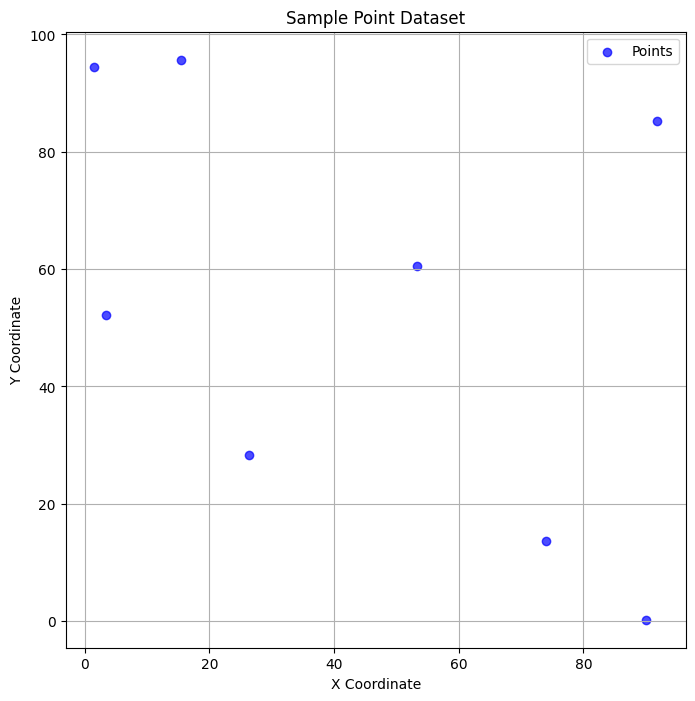

In [8]:
# Plot the points
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(points_df['X'], points_df['Y'], label='Points', color='blue', alpha=0.7)
ax.set_title("Sample Point Dataset")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
plt.legend()
plt.grid(True)

plt.show()

In [10]:
# Load points into a Shapely MultiPoint
points = []
with arcpy.da.SearchCursor(r"path_to_points.shp", ["SHAPE@XY"]) as cursor:
    for row in cursor:
        points.append(Point(row[0]))

# Create Shapely MultiPoint object
multi_point = MultiPoint(points)

# Fit the minimum bounding ellipse using Shapely
ellipse = multi_point.minimum_rotated_rectangle  # Approximates rotated ellipse
hull = ConvexHull(np.array(multi_point))

# Visualize or export the ellipse geometry
with arcpy.da.InsertCursor(r"path_to_output.shp", ['SHAPE@']) as ic:
    ic.insertRow([ellipse])

NameError: name 'arcpy' is not defined